In [19]:
import os
import sys

In [20]:
sys.path.append(os.path.abspath('../'))

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Tesla_Stock_Price_Prediction\data\TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [23]:
df.shape

(2416, 7)

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [25]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [28]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
print(df.duplicated().sum())

0


In [30]:
close_price = df['Close'].values

In [31]:
close_price[:5]

array([23.889999, 23.83    , 21.959999, 19.200001, 16.110001])

# EDA

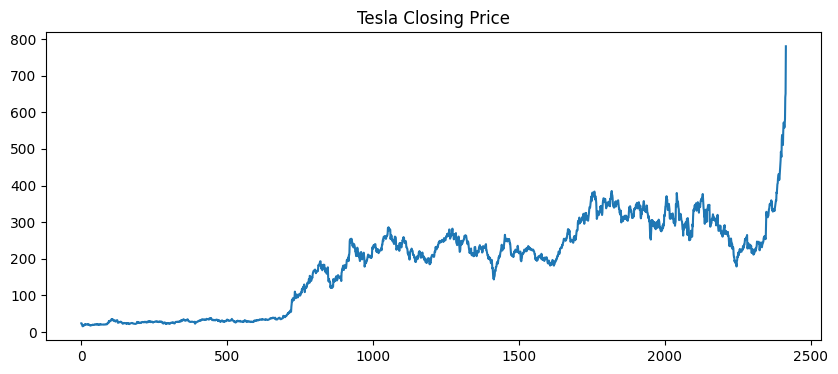

In [32]:
plt.figure(figsize = (10, 4))
plt.plot(df["Close"])
plt.title('Tesla Closing Price')
plt.show()

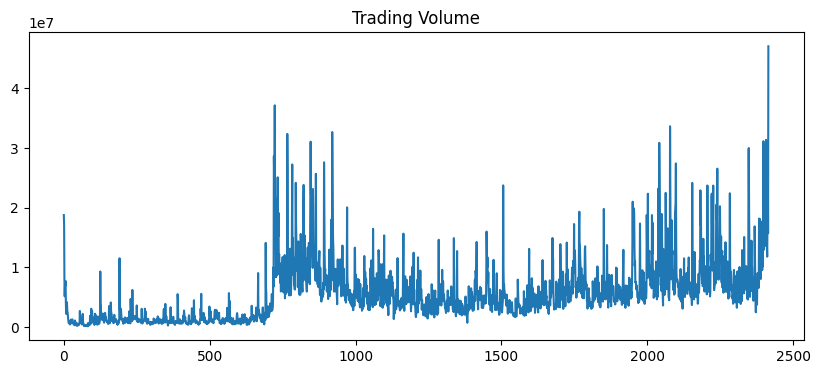

In [33]:
plt.figure(figsize = (10, 4))
plt.plot(df["Volume"])
plt.title("Trading Volume")
plt.show()

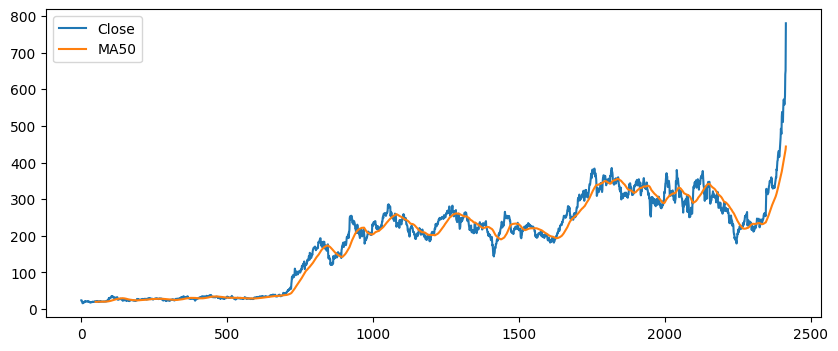

In [34]:
df["MA50"] = df["Close"].rolling(50).mean()
plt.figure(figsize = (10, 4))
plt.plot(df["Close"], label = "Close")
plt.plot(df["MA50"], label = "MA50")
plt.legend()
plt.show()

# Preprocessing

In [35]:
from utils.preprocess import create_sequences, scale_data

scaled_data, scaler = scale_data(close_price)

X, y = create_sequences(scaled_data)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Simple RNN Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM

c:\Users\H P\Desktop\Tesla_Stock_Price_Prediction\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [37]:
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

c:\Users\H P\Desktop\Tesla_Stock_Price_Prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
rnn_model.compile(optimizer = "adam", loss = "mse")

history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    batch_size = 32
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.6409e-04 - val_loss: 0.0026
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7101e-04 - val_loss: 0.0018
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.7790e-04 - val_loss: 0.0015
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.0838e-04 - val_loss: 0.0011
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.8784e-04 - val_loss: 0.0015
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.0557e-04 - val_loss: 0.0010
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8902e-04 - val_loss: 0.0010
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2934e-04 - val_loss: 8.7649e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8038e-04 - val_loss: 0.0010
Epoch 12/20
59/59 ━━━━━

In [39]:
rnn_model.save("../model/rnn_model.h5")

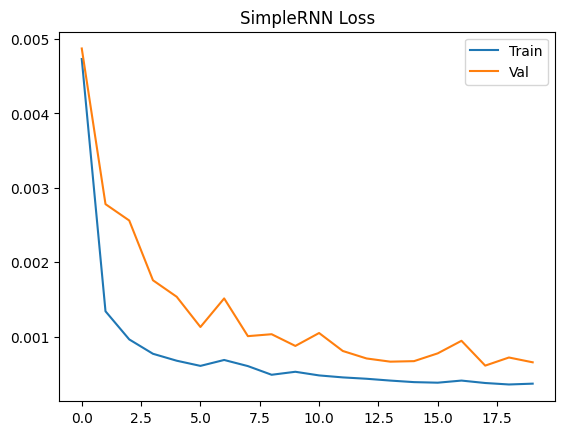

In [40]:
# Loss Curve - RNN
plt.plot(history_rnn.history["loss"], label="Train")
plt.plot(history_rnn.history["val_loss"], label="Val")
plt.title("SimpleRNN Loss")
plt.legend()
plt.show()

# LSTM Model

In [41]:
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

In [42]:
lstm_model.compile(optimizer="adam", loss="mse")
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0078 - val_loss: 0.0011
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.1683e-04 - val_loss: 0.0010
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.6158e-04 - val_loss: 9.9951e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.4116e-04 - val_loss: 9.6112e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.6958e-04 - val_loss: 9.8326e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2325e-04 - val_loss: 9.8543e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.2038e-04 - val_loss: 9.0801e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.0464e-04 - val_loss: 0.0012
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.6091e-04 - val_loss: 0.0014
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.9002e-04 - val_loss: 9.8377e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2038e-04 - val_loss: 8.1562

In [43]:
lstm_model.save("../model/lstm_model.h5")

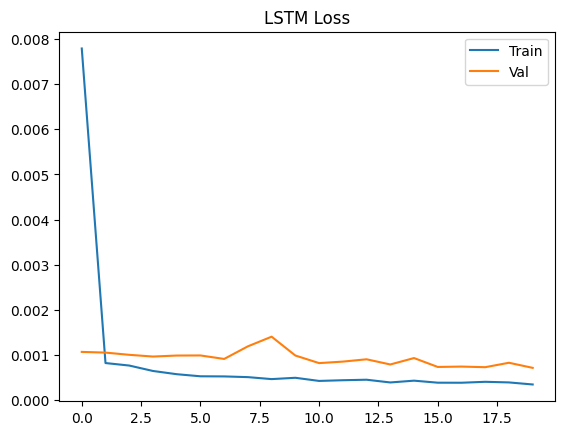

In [44]:
# Loss Curve - LSTM
plt.plot(history_lstm.history["loss"], label="Train")
plt.plot(history_lstm.history["val_loss"], label="Val")
plt.title("LSTM Loss")
plt.legend()
plt.show()